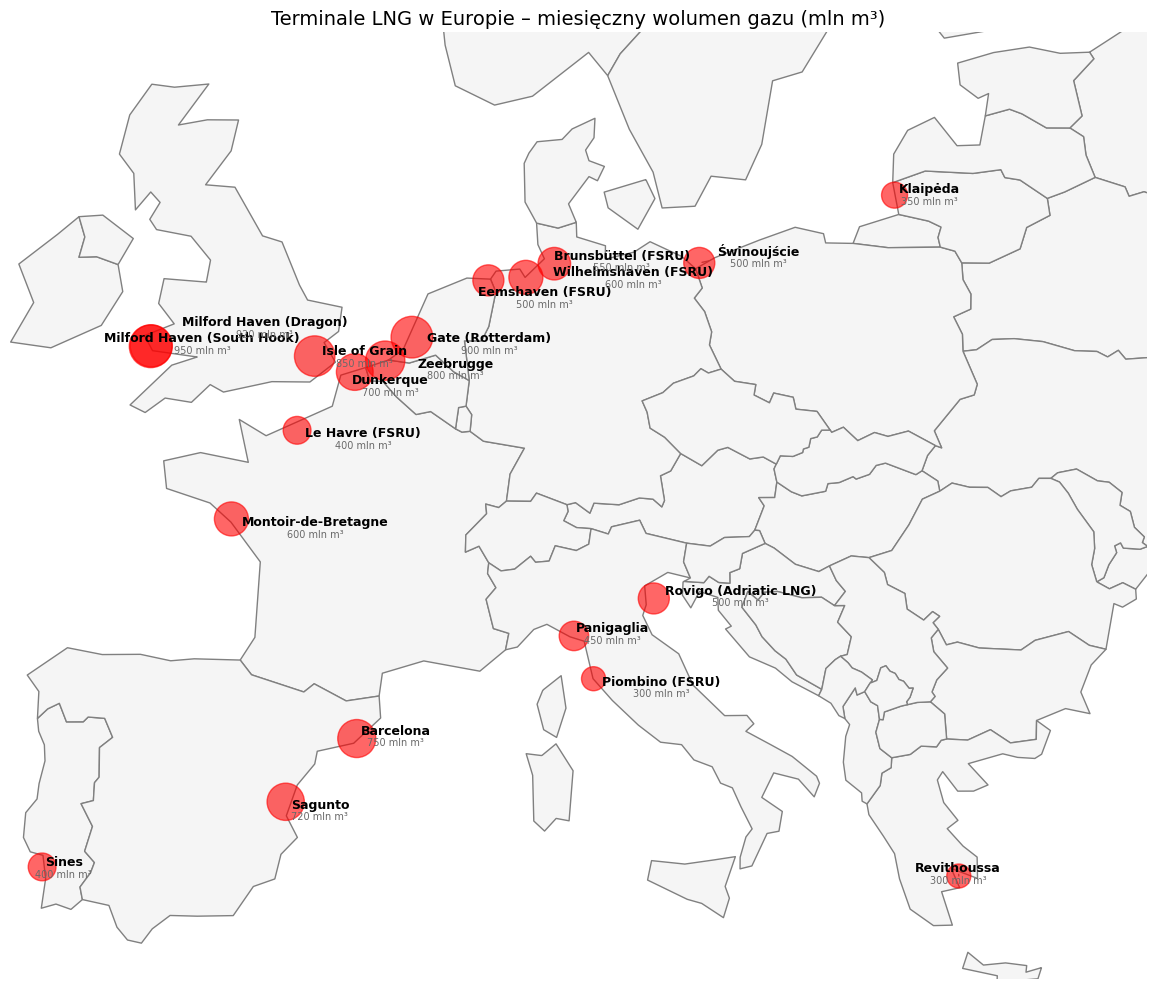

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from adjustText import adjust_text
from shapely.geometry import Point

# Przykładowe dane terminali LNG w Europie
terminals_data = {
    'name': [
        'Świnoujście', 'Klaipėda', 'Zeebrugge', 'Dunkerque', 'Montoir-de-Bretagne',
        'Barcelona', 'Sagunto', 'Sines', 'Revithoussa', 'Panigaglia',
        'Gate (Rotterdam)', 'Isle of Grain', 'Milford Haven (South Hook)',
        'Milford Haven (Dragon)', 'Rovigo (Adriatic LNG)', 'Piombino (FSRU)',
        'Wilhelmshaven (FSRU)', 'Brunsbüttel (FSRU)', 'Eemshaven (FSRU)', 'Le Havre (FSRU)'
    ],
    'country': [
        'Poland', 'Lithuania', 'Belgium', 'France', 'France',
        'Spain', 'Spain', 'Portugal', 'Greece', 'Italy',
        'Netherlands', 'UK', 'UK',
        'UK', 'Italy', 'Italy',
        'Germany', 'Germany', 'Netherlands', 'France'
    ],
    'lat': [
        53.91, 55.7, 51.33, 51.03, 47.15,
        41.35, 39.68, 37.96, 37.72, 44.06,
        51.95, 51.45, 51.71,
        51.72, 45.05, 42.93,
        53.53, 53.89, 53.45, 49.49
    ],
    'lon': [
        14.25, 21.12, 3.2, 2.13, -2.21,
        2.2, -0.3, -8.87, 23.38, 9.84,
        4.14, 0.72, -5.05,
        -5.03, 12.65, 10.53,
        8.15, 9.15, 6.83, 0.1
    ],
    'monthly_volume_mcm': [
        500, 350, 800, 700, 600,
        750, 720, 400, 300, 450,
        900, 850, 950,
        920, 500, 300,
        600, 550, 500, 400
    ]
}


# Tworzymy DataFrame
terminals_df = pd.DataFrame(terminals_data)
terminals_df['geometry'] = terminals_df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
terminals_gdf = gpd.GeoDataFrame(terminals_df, geometry='geometry', crs="EPSG:4326")

# Ścieżka do pliku shapefile — ZMIEŃ na lokalizację u siebie
shapefile_path = r"d:\GIS\global\packages\natural_earth_vector.gpkg"

# Wczytaj mapę Europy
world = gpd.read_file(shapefile_path, layer="ne_110m_admin_0_countries")
europe = world[world['CONTINENT'] == 'Europe']

# Tworzymy wykres
fig, ax = plt.subplots(figsize=(12, 10))


# Rysujemy terminale jako kartodiagram (wielkość proporcjonalna do miesięcznego wolumenu)
terminals_gdf.plot(ax=ax, markersize=terminals_gdf['monthly_volume_mcm'], color='red', alpha=0.6, zorder=3)

# Dodajemy etykiety z adjustText
texts = []
for x, y, label in zip(terminals_gdf.geometry.x, terminals_gdf.geometry.y, terminals_gdf['name']):
    texts.append(ax.text(x, y, label, fontsize=9, weight='bold',  zorder=4))

adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='gray'))

# Krok 2: dopiero teraz rysujemy mapę tła
europe.plot(ax=ax, color='whitesmoke', edgecolor='gray', zorder=1)
# Stylizacja
ax.set_title('Terminale LNG w Europie – miesięczny wolumen gazu (mln m³)', fontsize=14)
ax.set_xlim(-10, 30)
ax.set_ylim(35, 60)
ax.axis('off')

# Dodajemy etykiety wolumenu pod głównymi nazwami
for text, volume in zip(texts, terminals_gdf['monthly_volume_mcm']):
    x, y = text.get_position()
    ax.text(
        x, y - 0.4,  # przesunięcie w dół o ~0.4 stopnia
        f"{volume} mln m³",
        fontsize=7, color='dimgray',
        ha='center', zorder=4
    )

plt.tight_layout()
plt.show()
